dx 0.01 dt 0.009000000000000001 tmax 0.75 Nt 83


<IPython.core.display.Javascript object>


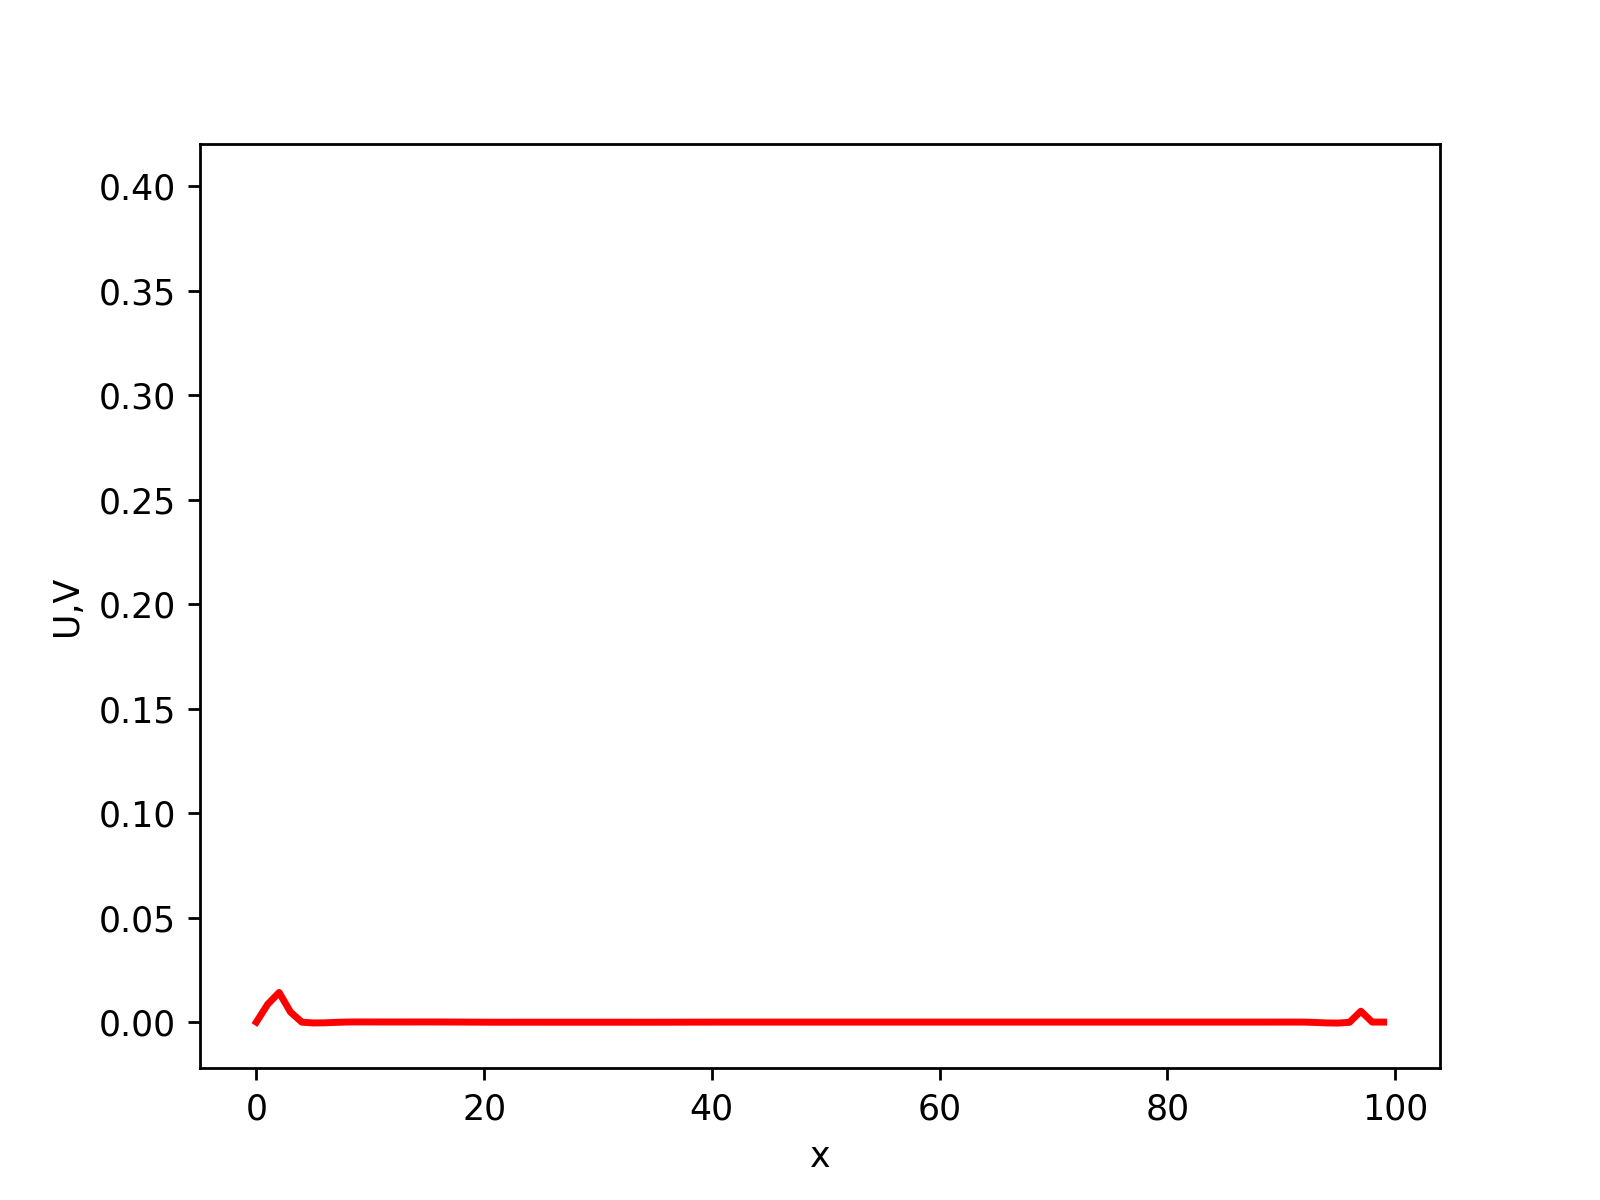

In [296]:
## 1D Hyperbolic System 
## elasticity 
## du/dt - dv/dx = 0
## dv/dt - d(sigma(u))/dx = 0

from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import ArtistAnimation 

def sigma(u):
  #  s = []
    s = E*E*u ##s=E^2*u*u/2
  #  for i in range(len(u)):
  #      s[i]=E*E*u[i]
    return s
def sigmaprime(u):
    sp=np.max(u)
    sp = E*E ##sp=E^2*u 
    return sp
def mm(a,b,c):  # centered, forward, backward
    minmod = 0.5*(np.sign(b)+np.sign(c))*np.min([0.5*abs(a),2.0*abs(b),2.0*abs(c)])
    return minmod                                                       
def flux(uh,vh,deltau,deltav):
    sigg=np.max(sigmaprime(uh))
    for i in range(1,Nx-2):
        uip=uh[i]+0.5*deltau[i]
        uipm=uh[i+1]-0.5*deltau[i+1]
        vip=vh[i]+0.5*deltav[i]
        vipm=vh[i+1]-0.5*deltav[i+1]
        f1[i]=0.5*(vip+vipm)-(0.5*sigg)*(uipm-uip)
        f2[i]=0.5*(sigma(uip)+sigma(uipm))-(0.5*sigg)*(vipm-vip)
    f1[0]=0.5*(vh[1]-vh[0])-0.5*sigg*(uh[1]-uh[0])
    f1[Nx-1]=0.5*(vh[Nx-1]-vh[Nx-2])-0.5*sigg*(uh[Nx-1]-uh[Nx-2])
    f2[Nx-1]=0.5*(sigma(uh[Nx-1])-sigma(uh[Nx-2]))-0.5*sigg*(vh[Nx-1]-vh[Nx-2])
    f2[0]=0.5*(sigma(uh[1])-sigma(uh[0]))-0.5*sigg*(vh[1]-vh[0])
    return(f1,f2)

L = 1 #length
tmax = 0.75 
Nx = 100
E=1.0 # linear elasticity sigma = E^2 u
deltax = L/Nx
deltat=0.9*deltax   #Maximum time step that satisfies the stability condition
Nt = int(np.rint(tmax/deltat))
print('dx',deltax,'dt',deltat,'tmax',tmax,'Nt',Nt)
dtdx=deltat/deltax 
time=0

u = np.zeros([Nx,Nt])
v = np.zeros([Nx,Nt])
uh = np.zeros([Nx])
vh = np.zeros([Nx])
f1 = np.zeros([Nx])
f2 = np.zeros([Nx])
deltau = np.zeros([Nx])
deltav = np.zeros([Nx])

"""  
#Initial conditions
for i in range (Nx) :
    u[i,0]=0
    v[i,0]=0
    if (i>=.4*Nx) and (i<=.5*Nx):
      #  u[i,0]=0.2*(0- (i*deltax-0.3)*(i*deltax-0.7) )
        u[i,0]=0.1
    if (i>=.5*Nx) and (i<=.6*Nx):
      #  u[i,0]=0.2*(0- (i*deltax-0.3)*(i*deltax-0.7) )
        u[i,0]=0.1   
 
""" 
for i in range (Nx) :
    if (i>=.3*Nx) and (i<=.5*Nx):
        u[i,0]=-0.3+(i*delta_x - .3)
    elif (i>=0.5*Nx) and (i<=0.7*Nx):
        u[i,0]=0.7-(i*delta_x -.7)
    else:
        u[i,0]=0              

for j in range(0,Nt-2):
    time=time+deltat
   ## print('time = ',time)
    ## first up - mid-time predictor
    for i in range(1,Nx-2):
        dup=u[i+1,j]-u[i,j]
        dum=u[i,j]-u[i-1,j]
        duc=u[i+1,j]-u[i-1,j]
        deltau[i]=mm(duc,dum,dup)
        dvp=v[i+1,j]-v[i,j]
        dvm=v[i,j]-v[i-1,j]
        dvc=v[i+1,j]-v[i-1,j]
        deltav[i]=mm(dvc,dvm,dvp)
    deltau[0]=0.0
    deltau[Nx-1]=0.0
    deltav[0]=0.0
    deltav[Nx-1]=0.0
    
###    for i in range(0,Nx-1):
###        deltau[i]=0
###        deltav[i]=0
        
    for i in range(1,Nx-2):
        uh[i]=u[i,j] - 0.5*dtdx*(deltav[i])
        vh[i]=v[i,j] - 0.5*dtdx*(sigma(u[i,j]+(deltau[i]/2))-sigma(u[i,j]-(deltau[i]/2)))
    uh[0]=0*uh[1]
    uh[Nx-1]=0*uh[Nx-2]
    vh[0]=-vh[1]
    vh[Nx-1]=-vh[Nx-2]
    
    ## step two - corrector
    f1,f2=flux(uh,vh,deltau,deltav)
    for i in range(1,Nx-2):
        u[i,j+1]=u[i,j]-dtdx*(f1[i]-f1[i-1])
        v[i,j+1]=v[i,j]-dtdx*(f2[i]-f2[i-1])
    u[0,j+1]=0*u[1,j+1]
    u[Nx-1,j+1]=0*u[Nx-2,j+1]
    v[0,j+1]=-v[1,j+1]
    v[Nx-1,j+1]=-v[Nx-2,j+1] 
    
x=list(range(Nx))
y=list(range(Nt))
X, Y = np.meshgrid(x,y)

#plt.plot(x,u[:,Nt-2],'b')
#plt.plot(x,v[:,Nt-2],'r')

def functu(u):
    z=u[X,Y]
    return z
def functv(v):
    z=v[X,Y]
    return z

#Z = functu(u)
#fig = plt.figure()
#ax = Axes3D(fig)
#ax.plot_wireframe(X,Y,Z, color='r')
#ax.set_xlabel('x')
#ax.set_ylabel('t')
#ax.set_zlabel('U')
#plt.show()


#""" 
%matplotlib nbagg 
#from matplotlib.animation import ArtistAnimation #Import methods for creating animations

fig = plt.figure()

anim = [] #A list for storing the data for animation

for i in range(0,Nt-2):
    U=list(u[:,i])
##    V=list(v[:,i])
    x=list(range(Nx))
 #   if i % int(Nt*0.01) ==0: 
    im=plt.plot(x,U, '-', color='red',markersize=10, linewidth = 2)
##    im=plt.plot(x,V, '-', color='blue',markersize=10, linewidth = 2)
    anim.append(im)

anim = ArtistAnimation(fig, anim) #Animation creation
plt.xlabel('x')
plt.ylabel('U,V')

fig.show()
#""" 

In [17]:
a=4
b=-2
c=-4
minmod = 0.5*(np.sign(b)+np.sign(c))*np.min([2*abs(a),0.5*abs(b),0.5*abs(c)])
print(minmod)

-1.0


In [211]:
def sigmaprime(aa):
    sp=1
    print(sp)
    for i in range(len(aa)):
        print(i,aa[i],len(aa))
        outt=np.max(aa)
        outt=outt*E*E
        if E*E*aa[i]>sp:
            sp=E*E*aa[i]
            print(sp)
        return outt
E=4
aa=[2,4,7,5,1]
print(sigmaprime(aa))

#print(np.max(sigmaprime(aa)))

1
0 2 5
32
112


In [220]:
uu=[1,3,2,4]
E=2
def sig(u):
    ss = []
    ss = E*E*u ##s=E^2*u*u/2
    print(len(u))
    for i in range(len(u)):
        ss[i]=E*E*u[i]
        print(i,ss[i])
    return ss
ss=sig(uu)
print(ss)

4
0 4
1 12
2 8
3 16
[4, 12, 8, 16, 1, 3, 2, 4, 1, 3, 2, 4, 1, 3, 2, 4]
